In [1]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install imblearn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE



In [3]:
df = pd.read_csv('framingham.csv')


In [4]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df.isnull().sum()
#looking for missing values 

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
df.duplicated().sum()
#so according to this we dont have any duplicate rows


0

In [8]:
print(df.columns)



Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


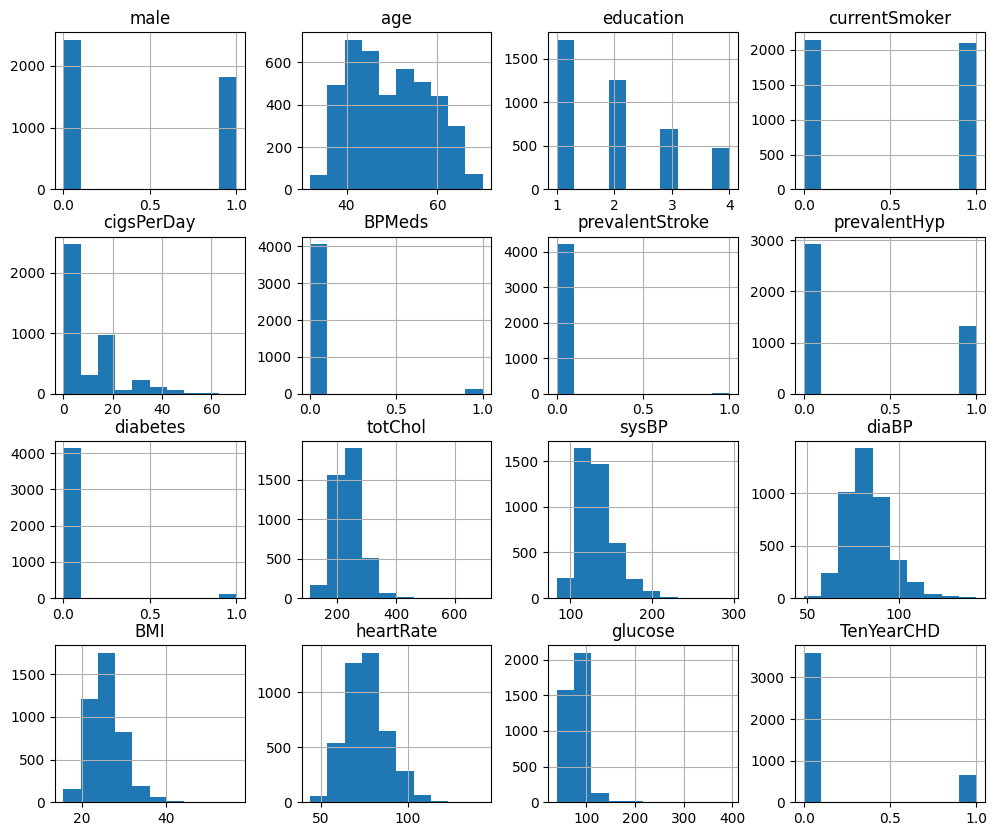

In [9]:
# Plot histograms for all numerical columns
df.hist(figsize=(12, 10))
plt.show()


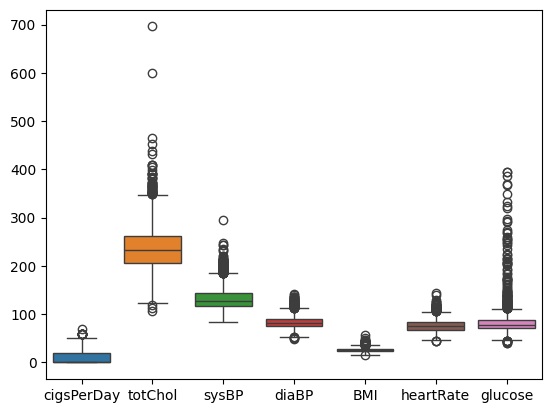

In [10]:
sns.boxplot(data=df[['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']])
plt.show()
#trying to identify outliers

In [11]:
# Check for missing values
df.isnull().sum()



male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [12]:


# Imputing missing values using .loc to avoid the warning
df.loc[:, 'education'] = df['education'].fillna(df['education'].mode()[0])#replacing missing values with mode
df.loc[:, 'cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())#replacing with median because there is skewed distribution so median is best
df.loc[:, 'BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])#replacing with mode because its most likely
df.loc[:, 'totChol'] = df['totChol'].fillna(df['totChol'].mean())#replacing missing values with mean because distribution is normal
df.loc[:, 'BMI'] = df['BMI'].fillna(df['BMI'].median())#skewed so better than mean is median
df.loc[:, 'heartRate'] = df['heartRate'].fillna(df['heartRate'].mean())#only one missing value so mean is okay
df.loc[:, 'glucose'] = df['glucose'].fillna(df['glucose'].mean())







In [13]:
# Check again for missing values to confirm they have been filled
print(df.isnull().sum())


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [14]:
#standardisation instead of normalisation, n health-related datasets, features like blood pressure, cholesterol, and BMI are often measured on different scales. Standardization helps in normalizing these differences, making the models more robust and reducing the bias towards features with larger numerical values.
X= df.drop('TenYearCHD', axis=1)
y=df['TenYearCHD']
#separating the features and target variable above
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
#standardisation of features above

In [15]:
##we're introducing a new feature that involves the interaction between bp and cholesterol as both together combined have a big impact on heart disease risk factor

# Step 1: Standardize the individual features 
scaler = StandardScaler()
df[['sysBP', 'totChol']] = scaler.fit_transform(df[['sysBP', 'totChol']])

# Step 2: Create the interaction feature using the standardized 'sysBP' and 'totChol'
df['BP_Chol_Interaction'] = df['sysBP'] * df['totChol']

# Step 3: Standardize the new interaction feature
df[['BP_Chol_Interaction']] = scaler.fit_transform(df[['BP_Chol_Interaction']])

# Step 4: Display the first few rows to verify
print(df[['sysBP', 'totChol', 'BP_Chol_Interaction']].head())




      sysBP   totChol  BP_Chol_Interaction
0 -1.196267 -0.940825             0.871022
1 -0.515399  0.300085            -0.343554
2 -0.220356  0.187275            -0.235966
3  0.800946 -0.263965            -0.397405
4 -0.106878  1.089756            -0.307318


In [16]:
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,BP_Chol_Interaction
0,1,39,4.0,0,0.0,0.0,0,0,0,-0.940825,-1.196267,70.0,26.97,80.0,77.0,0,0.871022
1,0,46,2.0,0,0.0,0.0,0,0,0,0.300085,-0.515399,81.0,28.73,95.0,76.0,0,-0.343554
2,1,48,1.0,1,20.0,0.0,0,0,0,0.187275,-0.220356,80.0,25.34,75.0,70.0,0,-0.235966
3,0,61,3.0,1,30.0,0.0,0,1,0,-0.263965,0.800946,95.0,28.58,65.0,103.0,1,-0.397405
4,0,46,3.0,1,23.0,0.0,0,0,0,1.089756,-0.106878,84.0,23.10,85.0,85.0,0,-0.307318


In [17]:
#not all columns standardised so we will standardise them again

# Standardize the features
scaler = StandardScaler()
features_to_scale = ['sysBP', 'totChol', 'diaBP', 'BMI', 'heartRate', 'glucose']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Create the interaction feature and standardize it
df['BP_Chol_Interaction'] = df['sysBP'] * df['totChol']
df[['BP_Chol_Interaction']] = scaler.fit_transform(df[['BP_Chol_Interaction']])

# Split the data into training and test sets
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Your data is now ready for model training


In [18]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,BP_Chol_Interaction
0,1,39,4.0,0,0.0,0.0,0,0,0,-0.940825,-1.196267,-1.083027,0.287693,0.342775,-0.217427,0,0.871022
1,0,46,2.0,0,0.0,0.0,0,0,0,0.300085,-0.515399,-0.159355,0.720094,1.590435,-0.261231,0,-0.343554
2,1,48,1.0,1,20.0,0.0,0,0,0,0.187275,-0.220356,-0.243325,-0.112769,-0.073111,-0.524054,0,-0.235966
3,0,61,3.0,1,30.0,0.0,0,1,0,-0.263965,0.800946,1.016227,0.683242,-0.904884,0.921472,1,-0.397405
4,0,46,3.0,1,23.0,0.0,0,0,0,1.089756,-0.106878,0.092555,-0.663098,0.758662,0.133004,0,-0.307318


In [19]:
##TRAINING DATA ON A LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'TenYearCHD' is the target variable

# Split the data into training and test sets
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}')




              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.58      0.06      0.10       123

    accuracy                           0.86       848
   macro avg       0.72      0.53      0.51       848
weighted avg       0.82      0.86      0.80       848

ROC AUC Score: 0.71


/opt/anaconda3/envs/heart_disease_project/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model with increased max_iter
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}')


              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.53      0.07      0.12       123

    accuracy                           0.86       848
   macro avg       0.70      0.53      0.52       848
weighted avg       0.81      0.86      0.80       848

ROC AUC Score: 0.71


/opt/anaconda3/envs/heart_disease_project/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model with a different solver and increased max_iter
model = LogisticRegression(random_state=42, solver='liblinear', max_iter=500)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}')

###ncreased Iterations (max_iter=200): Allowed the solver more time to find an optimal solution.
#Changed Solver (solver='liblinear'): Switched to a more robust and often faster solver that can handle convergence better in certain situations.
#Why This Fixed the Issue:
#Solver Adjustment: The liblinear solver is more robust and suited for the type of data or model you are working with, making it a good choice when facing convergence issues with the default lbfgs solver.
#Allowing More Iterations: Increasing the number of iterations ensures that the solver has enough time to converge, which is particularly important for complex datasets where finding the optimal solution takes longer.


              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.62      0.07      0.12       123

    accuracy                           0.86       848
   macro avg       0.74      0.53      0.52       848
weighted avg       0.83      0.86      0.81       848

ROC AUC Score: 0.71


In [22]:
#TRAINING DATA ON RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'TenYearCHD' is the target variable

# Step 1: Split the data into features and target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 5: Evaluate the model
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}')

#performance is shit


              precision    recall  f1-score   support

           0       0.86      0.98      0.92       725
           1       0.31      0.04      0.07       123

    accuracy                           0.85       848
   macro avg       0.59      0.51      0.49       848
weighted avg       0.78      0.85      0.79       848

ROC AUC Score: 0.66


In [23]:
#TRAINING ON RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'TenYearCHD' is the target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model with class balancing
model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}')

##Class Imbalance: The dataset is imbalanced, with many more instances of class 0 (no heart disease) than class 1 (heart disease). The model is biased towards predicting the majority class (class 0), which is why it has high precision and recall for class 0 but poor performance for class 1.
#Recall and F1-Score for Class 1: The model struggles to identify class 1 cases, as indicated by the very low recall (0.03) and F1-score (0.06). This is concerning for a heart disease prediction model, where correctly identifying at-risk individuals (class 1) is critical.
#ROC AUC Score: The ROC AUC score of 0.66 further confirms that the model is not effectively distinguishing between the two classes.


              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.44      0.03      0.06       123

    accuracy                           0.85       848
   macro avg       0.65      0.51      0.49       848
weighted avg       0.80      0.85      0.80       848

ROC AUC Score: 0.66


In [24]:
#TRAINING ON SVM MODEL
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Step 1: Split the data into features and target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the SVM model
model = SVC(kernel='linear', probability=True, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
model = SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced', C=1.0, gamma='scale')


# Step 5: Evaluate the model
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}')
#The SVM model shows a significant improvement in recall for detecting heart disease (class 1), but this has led to a decrease in precision, resulting in more false positives.
#The overall accuracy is moderate, and the ROC AUC score suggests the model has some discriminatory power, but there’s room for improvement in balancing precision and recall.



              precision    recall  f1-score   support

           0       0.91      0.64      0.76       725
           1       0.23      0.63      0.34       123

    accuracy                           0.64       848
   macro avg       0.57      0.64      0.55       848
weighted avg       0.81      0.64      0.69       848

ROC AUC Score: 0.71


In [25]:
!pip install xgboost


In [26]:
#TRAINING ON XGBOOST
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'TenYearCHD' is the target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = xgb.XGBClassifier(
    random_state=42,
    n_estimators=200,  # Number of boosting rounds (trees)
    learning_rate=0.1,  # Step size shrinkage
    max_depth=6,  # Maximum depth of a tree
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])  # Handling class imbalance
)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}')


              precision    recall  f1-score   support

           0       0.87      0.89      0.88       725
           1       0.24      0.21      0.23       123

    accuracy                           0.79       848
   macro avg       0.55      0.55      0.55       848
weighted avg       0.78      0.79      0.78       848

ROC AUC Score: 0.62


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and 'TenYearCHD' is the target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}')
#AGAIN FUCKIN SHIT PERFORMANCE


              precision    recall  f1-score   support

           0       0.85      0.97      0.91       725
           1       0.14      0.03      0.05       123

    accuracy                           0.83       848
   macro avg       0.50      0.50      0.48       848
weighted avg       0.75      0.83      0.78       848

ROC AUC Score: 0.62


In [28]:
!pip install tensorflow

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and 'TenYearCHD' is the target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(8, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_prob = model.predict(X_test).flatten()

print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}')


2024-09-06 20:23:32.651260: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100


/opt/anaconda3/envs/heart_disease_project/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7213 - loss: 0.5939 - val_accuracy: 0.8550 - val_loss: 0.4342
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8402 - loss: 0.4235 - val_accuracy: 0.8585 - val_loss: 0.4028
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8455 - loss: 0.4056 - val_accuracy: 0.8597 - val_loss: 0.4006
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8525 - loss: 0.3847 - val_accuracy: 0.8597 - val_loss: 0.3988
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8482 - loss: 0.3893 - val_accuracy: 0.8585 - val_loss: 0.3974
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8466 - loss: 0.3839 - val_accuracy: 0.8585 - val_loss: 0.3965
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8514 - loss: 0.3870 - val_accuracy: 0.8550 - val_loss: 0.3958
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8555 - loss: 0.3745 - val_accuracy: 0.8550

In [30]:
#COMBINING THE BEST TWO AND SEEING IF IT IMPROVES ACCURACY
#averaging probabilities
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and 'TenYearCHD' is the target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression and SVM models
lr = LogisticRegression(random_state=42)
svm = SVC(probability=True, random_state=42)

lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Get predicted probabilities from both models
lr_prob = lr.predict_proba(X_test)[:, 1]
svm_prob = svm.predict_proba(X_test)[:, 1]

# Average the predicted probabilities
combined_prob = (lr_prob + svm_prob) / 2

# Convert averaged probabilities to final predictions
combined_pred = (combined_prob > 0.5).astype(int)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, combined_pred))

# Print ROC AUC Score
roc_auc = roc_auc_score(y_test, combined_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')



Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       725
           1       0.40      0.02      0.03       123

    accuracy                           0.85       848
   macro avg       0.63      0.51      0.48       848
weighted avg       0.79      0.85      0.79       848

ROC AUC Score: 0.71


In [31]:
#majority voting
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
import numpy as np

# Assuming df is your DataFrame and 'TenYearCHD' is the target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression and SVM models
lr = LogisticRegression(random_state=42)
svm = SVC(probability=True, random_state=42)
rf = RandomForestClassifier(random_state=42)

lr.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Get predicted class labels from all models
lr_pred = lr.predict(X_test)
svm_pred = svm.predict(X_test)
rf_pred = rf.predict(X_test)

# Combine predictions using majority voting
predictions = np.array([lr_pred, svm_pred, rf_pred])
combined_pred, _ = mode(predictions, axis=0)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, combined_pred.flatten()))

# Since majority voting is based on class labels, use averaged probabilities for ROC AUC Score
lr_prob = lr.predict_proba(X_test)[:, 1]
svm_prob = svm.predict_proba(X_test)[:, 1]
rf_prob = rf.predict_proba(X_test)[:, 1]
combined_prob = (lr_prob + svm_prob + rf_prob) / 3

# Print ROC AUC Score
roc_auc = roc_auc_score(y_test, combined_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')


Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       725
           1       0.50      0.02      0.05       123

    accuracy                           0.85       848
   macro avg       0.68      0.51      0.48       848
weighted avg       0.81      0.85      0.79       848

ROC AUC Score: 0.69


/var/folders/gw/7lt6y70171qf2dsh6tmz5p400000gp/T/ipykernel_910/3278650955.py:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  combined_pred, _ = mode(predictions, axis=0)


In [32]:
#weighted voting
# Assuming the same initial setup as above

# Assign weights to each model's predictions
lr_weight = 0.6
svm_weight = 0.4

# Combine predictions with weights
weighted_prob = (lr_weight * lr_prob + svm_weight * svm_prob) / (lr_weight + svm_weight)

# Convert weighted probabilities to final predictions
weighted_pred = (weighted_prob > 0.5).astype(int)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, weighted_pred))

# Print ROC AUC Score
roc_auc = roc_auc_score(y_test, weighted_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')
##BEST METHOD, HIGHEST OVERALL ACCURACY AND ROC AUC SCORE


Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       725
           1       0.57      0.03      0.06       123

    accuracy                           0.86       848
   macro avg       0.71      0.51      0.49       848
weighted avg       0.82      0.86      0.80       848

ROC AUC Score: 0.71


In [33]:
# Assuming df is your DataFrame and 'TenYearCHD' is the target variable

# Count the number of instances of each class
class_counts = df['TenYearCHD'].value_counts()

# Print the counts for each class
print(class_counts)

# Optionally, you can print more descriptive output
print(f"Class 0 (No Heart Disease): {class_counts[0]}")
print(f"Class 1 (Heart Disease): {class_counts[1]}")


TenYearCHD
0    3596
1     644
Name: count, dtype: int64
Class 0 (No Heart Disease): 3596
Class 1 (Heart Disease): 644


In [34]:
#GONNA GENERATE SYNTHETIC DATA USING SMOTE
!pip install imbalanced-learn


In [35]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [36]:
# Assuming df is your DataFrame and 'TenYearCHD' is the target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Optionally, you can standardize the data (especially for models sensitive to feature scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
                               


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [38]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [39]:
# Check the distribution of the new training set
print(pd.Series(y_train_smote).value_counts())


TenYearCHD
0    2871
1    2871
Name: count, dtype: int64


In [40]:
#synthetic data generated, now we'll see the rest.

In [41]:

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is your original DataFrame and 'TenYearCHD' is the target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Standardize the data (optional, depending on your models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Convert back to DataFrame for viewing
X_train_smote_df = pd.DataFrame(X_train_smote, columns=df.drop('TenYearCHD', axis=1).columns)
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['TenYearCHD'])

# Combine the features and target into one DataFrame
augmented_df = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

# View the first few rows of the augmented dataset
print(augmented_df.head())


       male       age  education  currentSmoker  cigsPerDay    BPMeds  \
0 -0.867217  0.398955   1.025932       1.011863    0.928784 -0.173569   
1 -0.867217  1.682213   2.007862       1.011863   -0.247353 -0.173569   
2 -0.867217 -1.350943   1.025932      -0.988276   -0.751412 -0.173569   
3 -0.867217 -0.067685  -0.937929      -0.988276   -0.751412 -0.173569   
4  1.153113  0.748934   0.044002       1.011863    0.928784 -0.173569   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0        -0.077014     -0.671241 -0.162437 -0.354213 -0.061487  0.512406   
1        -0.077014      1.489778 -0.162437  0.051903  0.483208  0.092555   
2        -0.077014     -0.671241 -0.162437 -1.166445 -1.468614 -0.915087   
3        -0.077014     -0.671241 -0.162437  0.751326 -0.265747 -1.292953   
4        -0.077014     -0.671241 -0.162437 -1.143883 -0.742355 -1.334938   

        BMI  heartRate   glucose  BP_Chol_Interaction  TenYearCHD  
0 -0.419872   1.174548  0.571042    

In [42]:
#NOW LETS TRY RETRAINING THE MODELS ON THE NEW AUGMENTED DATA
#THE FIRST TO BE LOGISTIC REGRESSION 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare your features and target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 5: Train the Logistic Regression model on the augmented data
lr = LogisticRegression(random_state=42)
lr.fit(X_train_smote, y_train_smote)

# Step 6: Make predictions on the test set
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]  # Probability of the positive class (class 1)

# Step 7: Evaluate the model's performance
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}')


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.91      0.66      0.76       725
           1       0.23      0.60      0.33       123

    accuracy                           0.65       848
   macro avg       0.57      0.63      0.55       848
weighted avg       0.81      0.65      0.70       848

ROC AUC Score: 0.71


In [43]:
#LETS SEE IF WE CAN IMPROVE THIS WITH HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # L1 or L2 regularization
    'solver': ['liblinear']  # 'liblinear' supports both L1 and L2
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='roc_auc')

# Fit the model on the training data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("Best Logistic Regression Report:")
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}')


Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.91      0.65      0.76       725
           1       0.23      0.63      0.34       123

    accuracy                           0.65       848
   macro avg       0.57      0.64      0.55       848
weighted avg       0.81      0.65      0.70       848

ROC AUC Score: 0.71


In [44]:
#LETS TRY IMPROVING IT WITH THRESHOLD MOVING
# Predict probabilities
y_prob = lr.predict_proba(X_test)[:, 1]

# Adjust threshold
threshold = 0.4
y_pred_adjusted = (y_prob >= threshold).astype(int)

print("Adjusted Threshold Logistic Regression Report:")
print(classification_report(y_test, y_pred_adjusted))

#Threshold moving has effectively shifted the model’s focus towards better recall for the minority class(1), which can be crucial in certain applications. However, this comes at the cost of precision and overall accuracy. 

Adjusted Threshold Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.93      0.52      0.67       725
           1       0.22      0.78      0.34       123

    accuracy                           0.56       848
   macro avg       0.57      0.65      0.50       848
weighted avg       0.83      0.56      0.62       848



In [45]:
#LETS TRY IMPROVING IT WITH COST SENSITIVE LEARNING
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare your features and target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 5: Train the Logistic Regression model with cost-sensitive learning
lr_cost_sensitive = LogisticRegression(class_weight='balanced', random_state=42)
lr_cost_sensitive.fit(X_train_smote, y_train_smote)

# Step 6: Make predictions on the test set
y_pred = lr_cost_sensitive.predict(X_test)
y_prob = lr_cost_sensitive.predict_proba(X_test)[:, 1]  # Probability of the positive class (class 1)

# Step 7: Evaluate the model's performance
print("Cost-Sensitive Logistic Regression Report:")
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}')
#he recall for class 1 (0.60) is a positive outcome, especially since this is a key metric for detecting the minority class.BUT THE PRECISION IS STILL LOW




Cost-Sensitive Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.91      0.66      0.76       725
           1       0.23      0.60      0.33       123

    accuracy                           0.65       848
   macro avg       0.57      0.63      0.55       848
weighted avg       0.81      0.65      0.70       848

ROC AUC Score: 0.71


Best hyperparameter for Logistic Regression: {'C': 1}
Cost-Sensitive Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.91      0.66      0.76       725
           1       0.23      0.60      0.33       123

    accuracy                           0.65       848
   macro avg       0.57      0.63      0.55       848
weighted avg       0.81      0.65      0.70       848

ROC AUC Score: 0.71


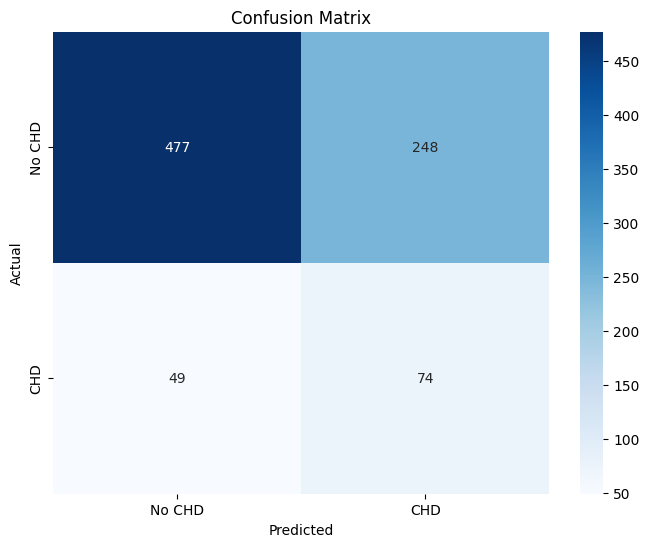

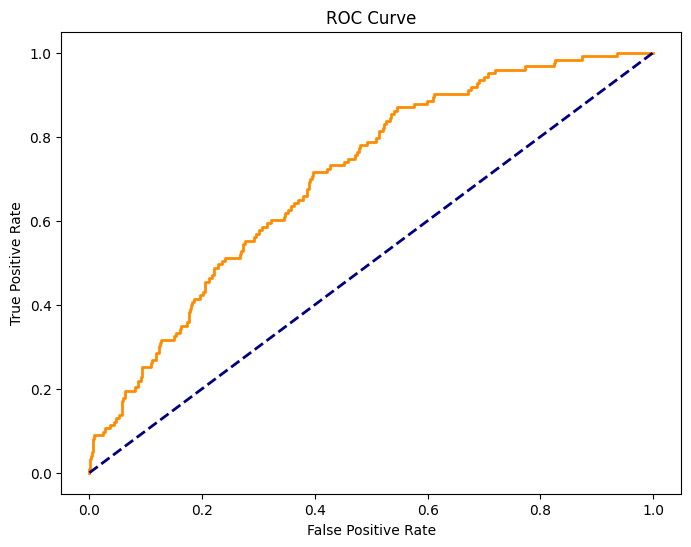

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Prepare your features and target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 5: Train the Logistic Regression model with cost-sensitive learning and hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100]}
lr_cost_sensitive = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42),
                                 param_grid, cv=StratifiedKFold(n_splits=5))
lr_cost_sensitive.fit(X_train_smote, y_train_smote)

# Best parameter
print(f"Best hyperparameter for Logistic Regression: {lr_cost_sensitive.best_params_}")

# Step 6: Make predictions on the test set
y_pred = lr_cost_sensitive.predict(X_test)
y_prob = lr_cost_sensitive.predict_proba(X_test)[:, 1]  # Probability of the positive class (class 1)

# Step 7: Evaluate the model's performance
print("Cost-Sensitive Logistic Regression Report:")
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
 


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       725
           1       0.23      0.65      0.34       123

    accuracy                           0.64       848
   macro avg       0.57      0.64      0.55       848
weighted avg       0.82      0.64      0.69       848

ROC AUC Score: 0.71


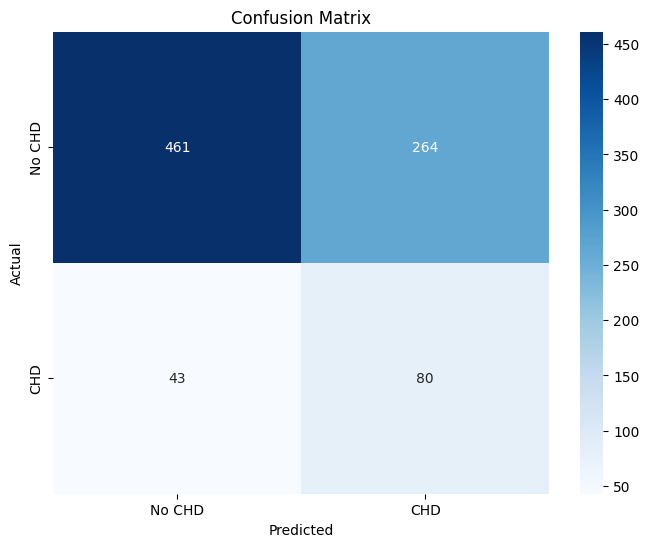

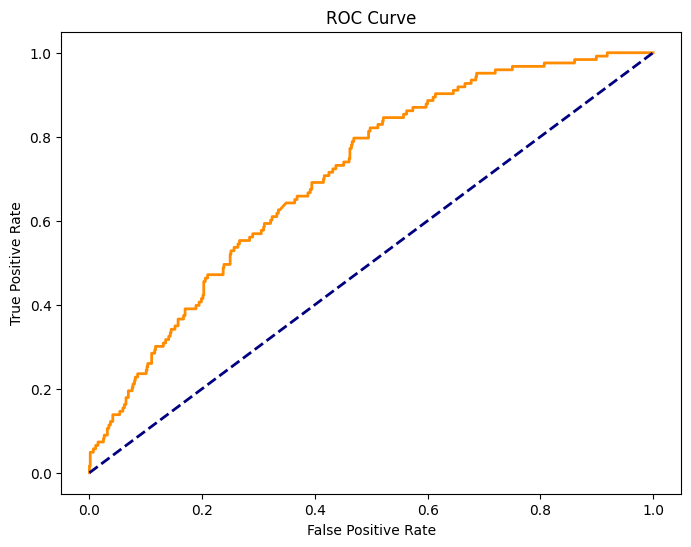

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare your features and target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 5: Train the SVM model with a linear kernel (faster)
svm_model = SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train_smote, y_train_smote)

# Step 6: Make predictions on the test set
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]  # Probability of the positive class (class 1)

# Step 7: Evaluate the model's performance
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


/opt/anaconda3/envs/heart_disease_project/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:31:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       725
           1       0.23      0.15      0.18       123

    accuracy                           0.80       848
   macro avg       0.55      0.53      0.54       848
weighted avg       0.77      0.80      0.78       848

ROC AUC Score: 0.63


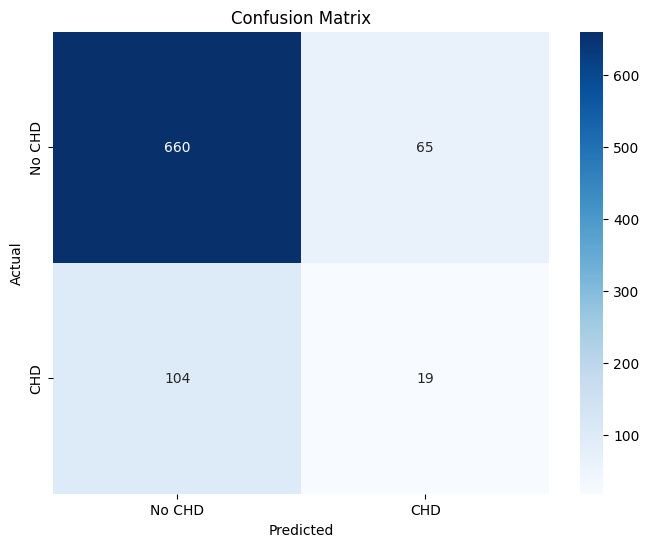

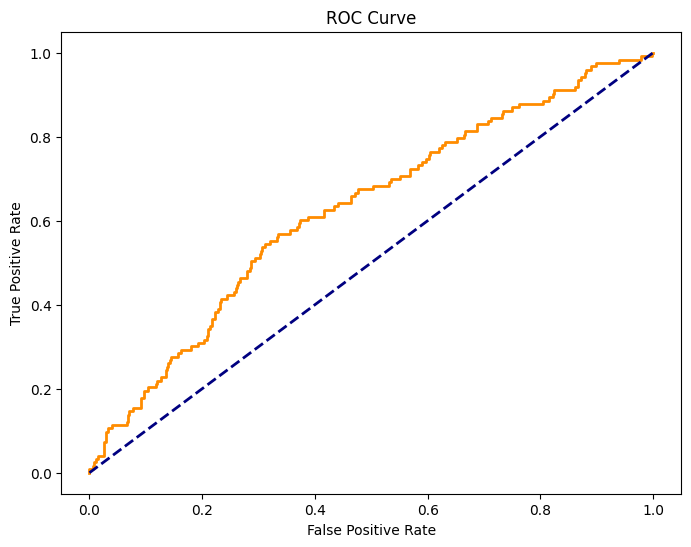

In [50]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare your features and target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 5: Train the XGBoost model
xgb_model = XGBClassifier(scale_pos_weight=len(y_train_smote[y_train_smote == 0]) / len(y_train_smote[y_train_smote == 1]),
                          random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_smote, y_train_smote)

# Step 6: Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]  # Probability of the positive class (class 1)

# Step 7: Evaluate the model's performance
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       725
           1       0.19      0.41      0.26       123

    accuracy                           0.66       848
   macro avg       0.53      0.56      0.52       848
weighted avg       0.78      0.66      0.70       848

ROC AUC Score: 0.60


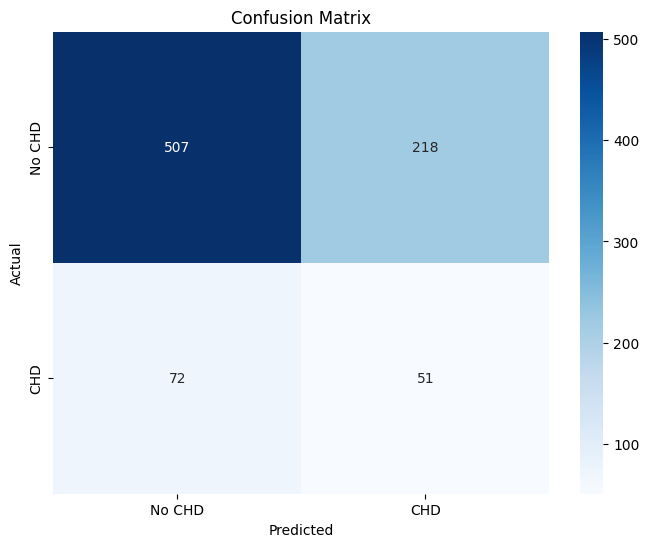

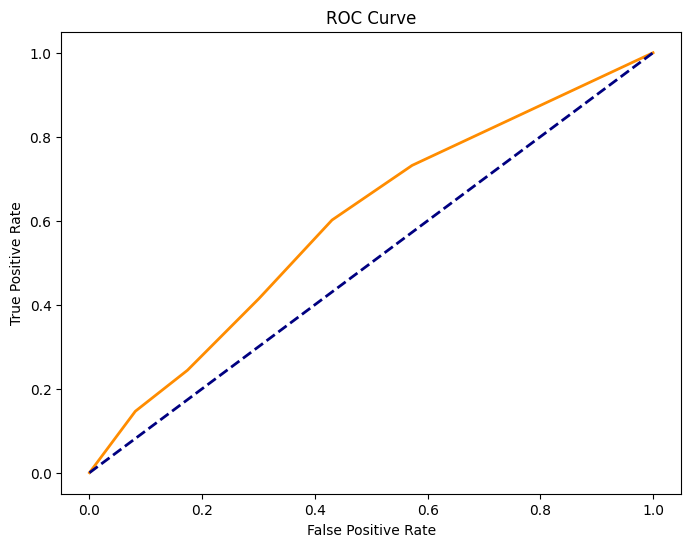

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare your features and target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 5: Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Using 5 nearest neighbors
knn_model.fit(X_train_smote, y_train_smote)

# Step 6: Make predictions on the test set
y_pred = knn_model.predict(X_test)
y_prob = knn_model.predict_proba(X_test)[:, 1]  # Probability of the positive class (class 1)

# Step 7: Evaluate the model's performance
print("KNN Classification Report:")
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Step 1: Prepare your features and target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE to the training data to augment it
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 4: Standardize the data
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# Step 5: Build the neural network model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_smote.shape[1],)),  # Input layer
    Dense(8, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Step 6: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Train the model on augmented (SMOTE) data
model.fit(X_train_smote, y_train_smote, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Step 8: Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_prob = model.predict(X_test).flatten()

print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}')


Epoch 1/100


/opt/anaconda3/envs/heart_disease_project/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5614 - loss: 0.7426 - val_accuracy: 0.6250 - val_loss: 0.6162
Epoch 2/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6422 - loss: 0.6391 - val_accuracy: 0.6745 - val_loss: 0.5822
Epoch 3/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.6651 - loss: 0.6107 - val_accuracy: 0.6498 - val_loss: 0.6181
Epoch 4/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.6942 - loss: 0.5857 - val_accuracy: 0.6533 - val_loss: 0.6223
Epoch 5/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6778 - loss: 0.5966 - val_accuracy: 0.6616 - val_loss: 0.6122
Epoch 6/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6942 - loss: 0.5843 - val_accuracy: 0.6521 - val_loss: 0.6250
Epoch 7/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.7111 - loss: 0.5684 - val_accuracy: 0.6521 - val_loss: 0.6294
Epoch 8/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.7051 - loss: 0.5774 - val_accuracy

In [53]:
#combining results of svm and LR together
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Step 1: Prepare your features and target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE to the training data to augment it
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 4: Standardize the data
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# Step 5: Train Logistic Regression and SVM models
lr = LogisticRegression(random_state=42)
svm = SVC(probability=True, random_state=42)

lr.fit(X_train_smote, y_train_smote)
svm.fit(X_train_smote, y_train_smote)

# Step 6: Get predicted probabilities from both models
lr_prob = lr.predict_proba(X_test)[:, 1]
svm_prob = svm.predict_proba(X_test)[:, 1]

# Step 7: Average the predicted probabilities
combined_prob = (lr_prob + svm_prob) / 2

# Step 8: Convert averaged probabilities to final predictions
combined_pred = (combined_prob > 0.5).astype(int)

# Step 9: Print classification report and ROC AUC Score
print("Classification Report:")
print(classification_report(y_test, combined_pred))

roc_auc = roc_auc_score(y_test, combined_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       725
           1       0.19      0.42      0.26       123

    accuracy                           0.65       848
   macro avg       0.53      0.56      0.52       848
weighted avg       0.78      0.65      0.70       848

ROC AUC Score: 0.61


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.68      0.77       725
           1       0.20      0.46      0.27       123

    accuracy                           0.65       848
   macro avg       0.54      0.57      0.52       848
weighted avg       0.78      0.65      0.70       848

ROC AUC Score: 0.61


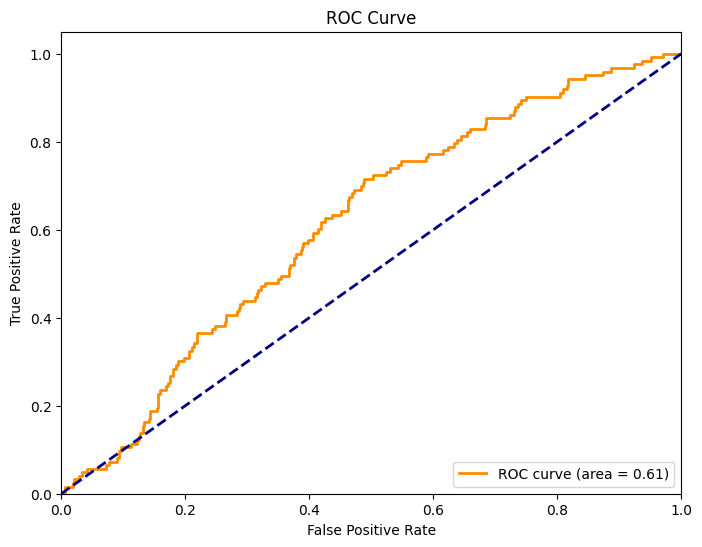

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Step 1: Prepare your features and target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE to the training data to augment it
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 4: Standardize the data
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# Step 5: Train Logistic Regression and SVM models
lr = LogisticRegression(random_state=42)
svm = SVC(probability=True, random_state=42)

lr.fit(X_train_smote, y_train_smote)
svm.fit(X_train_smote, y_train_smote)

# Step 6: Get predicted probabilities from both models
lr_prob = lr.predict_proba(X_test)[:, 1]
svm_prob = svm.predict_proba(X_test)[:, 1]

# Step 7: Assign weights to each model's predictions
lr_weight = 0.6
svm_weight = 0.4

# Step 8: Combine predictions with weights
weighted_prob = (lr_weight * lr_prob + svm_weight * svm_prob) / (lr_weight + svm_weight)

# Step 9: Convert weighted probabilities to final predictions
weighted_pred = (weighted_prob > 0.5).astype(int)

# Step 10: Print classification report and ROC AUC Score
print("Classification Report:")
print(classification_report(y_test, weighted_pred))

roc_auc = roc_auc_score(y_test, weighted_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Step 11: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, weighted_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
